In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
telcoChurn= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
telcoChurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
telcoChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
telcoChurn["gender"].max()

'Male'

In [85]:
telcoChurn["Partner"].max()
#Those who have partners

'Yes'

In [ ]:
#the marketing has to target their advertisement to males who have partners so as to increase customer retention

In [9]:
telcoChurn.groupby(['Partner','Churn'])['Churn'].count().unstack().head(30)

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [10]:
telcoChurn.groupby(['gender','Churn'])['Churn'].count().unstack().head(30)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [16]:
telcoChurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
telcoChurn.groupby(['PhoneService', 'MonthlyCharges'])['Churn'].count()

PhoneService  MonthlyCharges
No            23.45             1
              23.90             1
              24.10             1
              24.15             1
              24.20             1
                               ..
Yes           118.20            1
              118.35            1
              118.60            2
              118.65            1
              118.75            1
Name: Churn, Length: 1793, dtype: int64

In [13]:
telcoChurn["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

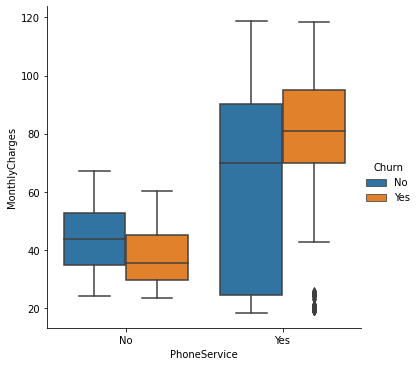

In [14]:
sns.catplot(x="PhoneService", y="MonthlyCharges", hue="Churn", data=telcoChurn, kind="box")
#Phone services contribute to high monthly charges resulting to customers churning

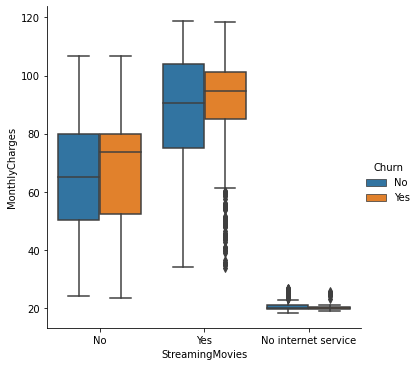

In [39]:
sns.catplot(x="StreamingMovies", y="MonthlyCharges", hue="Churn", data=telcoChurn, kind="box")
#Streaming movies contributes to high monthly charges resulting to more consumers churning

In [57]:
tc= telcoChurn.groupby(['MonthlyCharges','Churn','MultipleLines'])['Churn'].count().unstack()
tc

,MultipleLines,No,No phone service,Yes
MonthlyCharges,Churn,,,
18.25,No,1.0,NaN,NaN
18.40,No,1.0,NaN,NaN
18.55,No,1.0,NaN,NaN
18.70,No,2.0,NaN,NaN
18.75,No,1.0,NaN,NaN
...,...,...,...,...
118.20,No,NaN,NaN,1.0
118.35,Yes,NaN,NaN,1.0
118.60,No,NaN,NaN,2.0


In [71]:
telcoChurn.groupby(['Contract','Churn','PhoneService'])['Churn'].count().unstack()
#month-to-month contract would encourage customer retention because high number of non-churning customers

PhoneService           No   Yes
Contract       Churn           
Month-to-month No     223  1997
               Yes    153  1502
One year       No     131  1176
               Yes     14   152
Two year       No     158  1489
               Yes      3    45

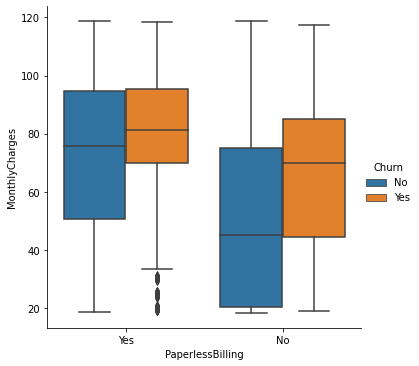

In [75]:
sns.catplot(x="PaperlessBilling", y="MonthlyCharges", hue="Churn", data=telcoChurn, kind="box")


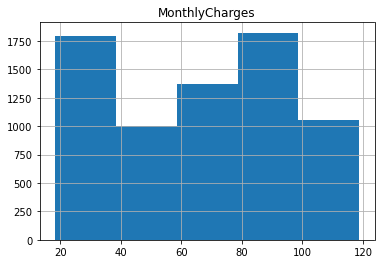

In [120]:
telcoChurn = telcoChurn.hist(column='MonthlyCharges', bins=5)
#BASIC- upto 40
#PLUS- 40-78
#PREMIUM- 79-119

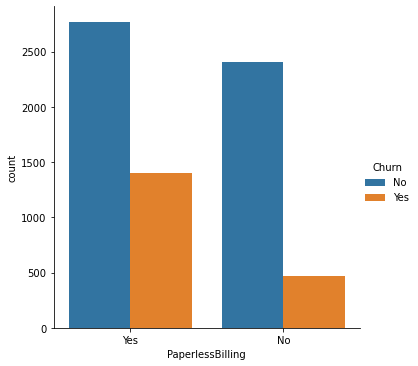

In [125]:
#the company should strictly go paperless for their monthly billings as a technique of keeping their customers
sns.catplot(x="PaperlessBilling", hue="Churn", data=telcoChurn, kind="count")